# Screening For Dyslexia Using Eye Tracking during Reading - Story Telling

Introduction The goal was to be able to predict dyslexia fraud detection and the intial step was observing the data and getting it ready for analysis. Now here the standardised data is transformed in to a story and what information can be inferred from it by visuvalizating the analysis.

Goals . Understand the distribution of the data we have taken for our question.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.gridspec as gridspec
import seaborn as sns

In [2]:
import pandas as pd
import numpy as np
import os
import copy
%matplotlib inline    
import matplotlib.pyplot as plt
from sklearn.model_selection import  train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_curve
#df = pd.DataFrame(columns = ['T','LX','LY','RX','RY','DistanceL','DistanceR','Subject'])
#df1 = pd.DataFrame(columns = ['Subject','DistanceR','DistanceL', 'Gender', 'Label'])
labels = [1, 1, 0, 0] #1: Disabled
gender = [1,0,1,0] #1: Male

In [3]:
df = pd.read_csv('C:\Springboard\Springboard01\Capstone\Capstone 2\Data\datawithfeatures.csv')
df.shape

(185, 53)

# What can be observed from the data and how it can be visualized?
Looking at the first five rows, the 53 variables are of type float64 and int64. The Label and Gender contains either a zero or 1

In [4]:
df.head()

,DistanceL,DistanceR,Gender,Label,Subject,LTypeFSum,LTypeSSum,LTypeFCount,LTypeSCount,LTypeFMean,...,LVerDirNMean,RVerDirUSum,RVerDirDSum,RVerDirNSum,RVerDirUCount,RVerDirDCount,RVerDirNCount,RVerDirUMean,RVerDirDMean,RVerDirNMean
0,13413.296257,13580.306540,1,0,111GM3,15320.0,14520.0,171,172,89.590643,...,62.027027,11220.0,9900.0,8860.0,262,235,148,42.824427,42.127660,60.272109
1,8788.682167,8509.062191,0,1,111JA2,22100.0,17840.0,288,288,77.003484,...,43.737024,13740.0,13520.0,12680.0,324,317,302,42.407407,42.784810,41.986755
2,9765.357380,10281.893102,1,1,111RP1,24780.0,15180.0,239,240,103.682008,...,47.918367,14680.0,13300.0,11860.0,326,357,260,45.030675,37.254902,45.791506
3,11950.957324,11461.339153,1,0,112JU3,23920.0,15960.0,243,244,98.436214,...,46.666667,10600.0,13300.0,15980.0,270,360,329,39.259259,36.944444,48.719512
4,4959.743932,4913.022136,1,1,112KA1,29920.0,9760.0,249,249,120.645161,...,33.717579,12420.0,15920.0,11580.0,400,457,355,31.050000,34.912281,32.619718


In [5]:
df.columns

Index(['DistanceL', 'DistanceR', 'Gender', 'Label', 'Subject', 'LTypeFSum',
       'LTypeSSum', 'LTypeFCount', 'LTypeSCount', 'LTypeFMean', 'LTypeSMean',
       'RTypeFSum', 'RTypeSSum', 'RTypeFCount', 'RTypeSCount', 'RTypeFMean',
       'RTypeSMean', 'LHorDirLSum', 'LHorDirRSum', 'LHorDirNSum',
       'LHorDirLCount', 'LHorDirRCount', 'LHorDirNCount', 'LHorDirLMean',
       'LHorDirRMean', 'LHorDirNMean', 'RHorDirLSum', 'RHorDirRSum',
       'RHorDirNSum', 'RHorDirLCount', 'RHorDirRCount', 'RHorDirNCount',
       'RHorDirLMean', 'RHorDirRMean', 'RHorDirNMean', 'LVerDirUSum',
       'LVerDirDSum', 'LVerDirNSum', 'LVerDirUCount', 'LVerDirDCount',
       'LVerDirNCount', 'LVerDirUMean', 'LVerDirDMean', 'LVerDirNMean',
       'RVerDirUSum', 'RVerDirDSum', 'RVerDirNSum', 'RVerDirUCount',
       'RVerDirDCount', 'RVerDirNCount', 'RVerDirUMean', 'RVerDirDMean',
       'RVerDirNMean'],
      dtype='object')

The distance is computed using sqrt(square(x1-x2) + square(y1-y2). From the data extract few more columns from the eye movement data by adding LType and RType. S-Saccade and F-Fixation: If the distance travelled is < 1 (review this) then it is Fixation else Saccade. Also the eye movements of left and right in the direction of horizontal and vertical. Here three displacements are considered one left, right and no change( L, R, N) and (U, D, N). Also Since the data is recorded per folder we used a loop function to reach out to each folder and collect them all in to one table. That is a data frame with 185 rows x 53 columns

# Distribution of data


In [6]:
df.describe()

,DistanceL,DistanceR,Gender,Label,LTypeFSum,LTypeSSum,LTypeFCount,LTypeSCount,LTypeFMean,LTypeSMean,...,LVerDirNMean,RVerDirUSum,RVerDirDSum,RVerDirNSum,RVerDirUCount,RVerDirDCount,RVerDirNCount,RVerDirUMean,RVerDirDMean,RVerDirNMean
count,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,...,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000
mean,6585.871559,6553.764893,0.783784,0.524324,22536.432432,12212.648649,194.021622,194.432432,120.621634,64.111998,...,44.396566,10030.486486,14645.405405,9920.864865,264.054054,306.410811,231.567568,39.107292,87.740239,44.540128
std,2771.196545,2771.414487,0.412781,0.500763,6748.853222,3628.009098,48.187581,48.166909,42.085094,16.826506,...,10.862595,3119.559661,5411.115871,2861.331270,84.112097,100.920567,68.436237,8.457896,367.802987,10.888885
min,2047.392546,1988.536710,0.000000,0.000000,9640.000000,3420.000000,94.000000,94.000000,57.941176,33.561644,...,22.281879,360.000000,4920.000000,440.000000,9.000000,9.000000,9.000000,21.908127,29.285714,21.721854
25%,4593.337099,4497.060439,1.000000,0.000000,16740.000000,9760.000000,159.000000,159.000000,91.137725,50.430108,...,36.153846,7980.000000,10760.000000,8420.000000,199.000000,224.000000,179.000000,32.870813,37.671642,36.800000
50%,6251.930046,6164.514653,1.000000,1.000000,22880.000000,11780.000000,188.000000,188.000000,115.760369,62.990654,...,43.300971,9980.000000,13840.000000,9940.000000,268.000000,309.000000,244.000000,38.217822,43.490909,43.820225
75%,8023.118344,7882.548250,1.000000,1.000000,29040.000000,14720.000000,226.000000,226.000000,143.036649,75.487179,...,50.672646,11740.000000,18260.000000,11800.000000,335.000000,400.000000,283.000000,44.444444,53.935185,50.807453
max,20065.840915,19384.424327,1.000000,1.000000,36540.000000,23360.000000,313.000000,313.000000,361.782178,118.437500,...,91.111111,16940.000000,35820.000000,18700.000000,419.000000,470.000000,374.000000,71.262136,4477.500000,88.888889


# Observations
The data set consists of eye movements that were recorded as part of an ophthalmological examination that aimed to investigate whether there were any differences between the two groups( controls and reading disabled) in terms of basic visual and oculomotor functions. Recordings were available for 185 subjects, 97 HR(High-risk) subjects (76 males and 21 females) and 88 LR(Low-risk) subjects (69 males and 19 females). All subjects read one and the same text. 

The dataset consists of numerical values from the transformed features which has Gender, Label, Subject and 50 features derived from the movement of the eye and time that were recorded. Since it is derived from the data set there is no null or missing values.The information contained in these features captures different quantitative properties of eye movements in reading, including their duration, amplitude, direction, stability and symmetry.


In [7]:
df.groupby(by =['Label']).size()

Label
0    88
1    97
dtype: int64

# How are these parameters distibuted?
Let us try to get the distribution of the parameters. 

Gender  Label
0       0        AxesSubplot(0.125,0.125;0.775x0.755)
        1        AxesSubplot(0.125,0.125;0.775x0.755)
1       0        AxesSubplot(0.125,0.125;0.775x0.755)
        1        AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

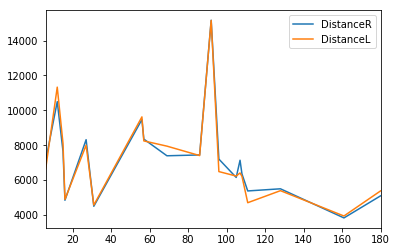

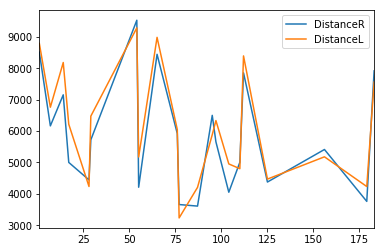

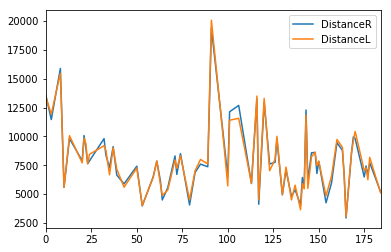

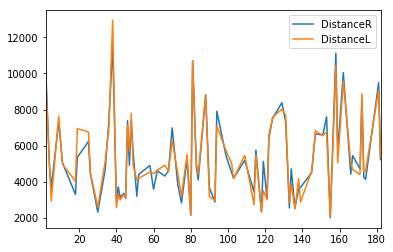

In [8]:
#df1.groupby('Label').plot(y=['DistanceR', 'DistanceL'])
#df1.groupby('Gender').plot(y=['DistanceR', 'DistanceL'])
df.groupby(['Gender', 'Label']).plot(y=['DistanceR', 'DistanceL'])

In [11]:
df2 = df.drop(["Subject"],axis=1)

In [12]:
df0 = df[df['Label'] == 0]
df0.shape

(88, 53)

In [13]:
#Fraud Transactions
df1 = df[df['Label'] == 1]
df1.shape

(97, 53)

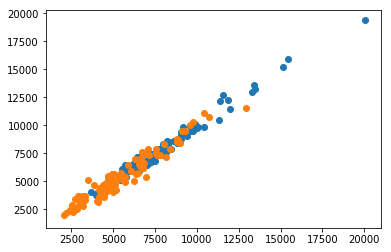

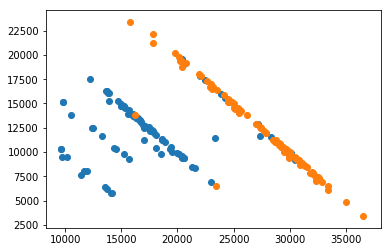

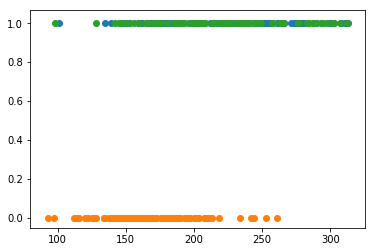

In [14]:
plt.scatter(df0['DistanceL'], df0['DistanceR'])
plt.scatter(df1['DistanceL'], df1['DistanceR'])
plt.show()
plt.scatter(df0['LTypeFSum'], df0['LTypeSSum'])
plt.scatter(df1['LTypeFSum'], df1['LTypeSSum'])
plt.show()
plt.scatter(df1['LTypeFCount'], df1['Label'])
plt.scatter(df0['RTypeFCount'], df0['Label'])
plt.scatter(df1['RTypeFCount'], df1['Label'])
plt.show()
plt.show()

A simple set of low-level features were defined that ranged over both fixation and saccadic events.  The eye movement analysis where the horizontal (CH) and vertical (CV) eye movement signal is plotted over time The analyzes tracks signal sample by sample and switches between two states: fixations, and saccades. A fixation state is detected when the eyes have remained stable for at least 50 ms, and a saccade state when the eyes have moved beyond the threshold distance. Once a change of state is detected, the samples of the previous state are identified as a new event.

Comparing the DistanceL and DistanceR on plot indicates it is similar between the controls and reading disability subjects. But the relationship LTypeFSum and LTypeSSum which denotes the fixation and saccde tells a different story. The fixation time differs for the subject and when it is plotted of the count with labe it shows the complete distinction of the two. 

# Compare the distance travelled by each eye for the control and dyslexic groups
Looking at a scatter plot between the left and right eye movements - distance travelled, we see that both eyes travel almost equal distances, with some exceptions for dyslexic kids, their eyes traveling longer distances.

Then we look at the number of saccades and fixations for each of the groups. we see that the number of saccades as well as the fixations are almost the same between the right and left eyes - indicated by the slope of the line. However, the number of saccaded and fixations are more for dyslexic kids than control kids. 

This may be because dyslexic kids move their eyes more frequently than control groups to travel the same distance.

Note: these charts have the same scale for x and y axes


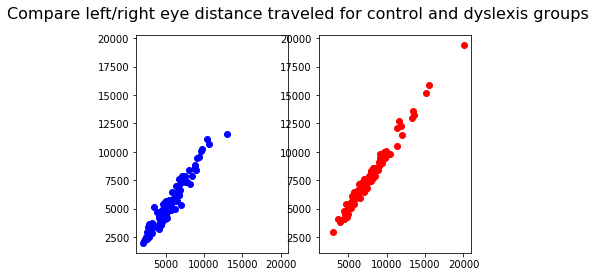

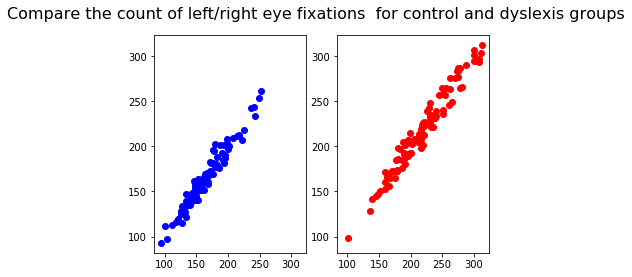

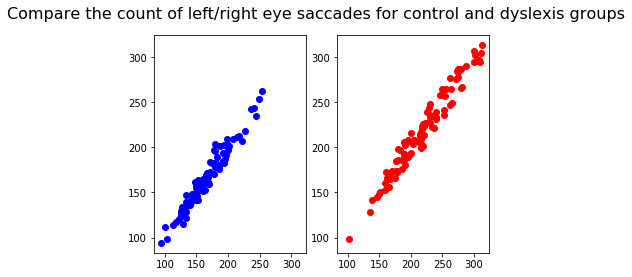

In [15]:
#Comparing left eye to right eye for controls (blue) and dyslexic (red) - No of Fixations, No of Saccades and distance traveled
fig = plt.figure()
fig.suptitle('Compare left/right eye distance traveled for control and dyslexis groups', fontsize=16)
ax1 = fig.add_subplot(121)
ax1.plot(df1['DistanceL'], df1['DistanceR'], 'bo')
ax2 = fig.add_subplot(122, sharex = ax1, sharey=ax1)
ax2.plot(df0['DistanceL'], df0['DistanceR'], 'ro')
plt.show()
fig = plt.figure()
fig.suptitle('Compare the count of left/right eye fixations  for control and dyslexis groups', fontsize=16)
ax1 = fig.add_subplot(121)
ax1.plot(df0['LTypeFCount'], df0['RTypeFCount'], 'bo')
ax2 = fig.add_subplot(122, sharex = ax1, sharey=ax1)
ax2.plot(df1['LTypeFCount'], df1['RTypeFCount'], 'ro')
plt.show()
fig = plt.figure()
fig.suptitle('Compare the count of left/right eye saccades for control and dyslexis groups', fontsize=16)
ax1 = fig.add_subplot(121)
ax1.plot(df0['LTypeSCount'], df0['RTypeSCount'], 'bo')
ax2 = fig.add_subplot(122, sharex=ax1, sharey=ax1)
ax2.plot(df1['LTypeSCount'], df1['RTypeSCount'], 'ro')
plt.show()

Saccades were divided into (left-to-right) and (right-to-left) movements and fixations were defined accordingly, depending on the direction of the preceding saccade. For each type of fixation and saccade, the parameters are defined measuring (1) the duration of the event; (2) the distance spanning the event; (3) the average eye position during the event; {(4) the standard deviation of the average position; } (5) the maximum range between any two positions; and, (6) the accumulated distance over all subsequent positions. It was also measured horizontally and vertically.

The sum of the horizontal/vertical distances moved by the dyslexic group as well as the count of horizontal/vertical distances moved by the dyslexic group are higher than the control group.  But the mean distance traveled by the horizontal/vertical movements is about the same.

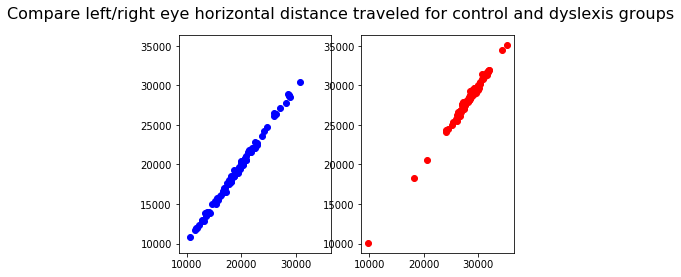

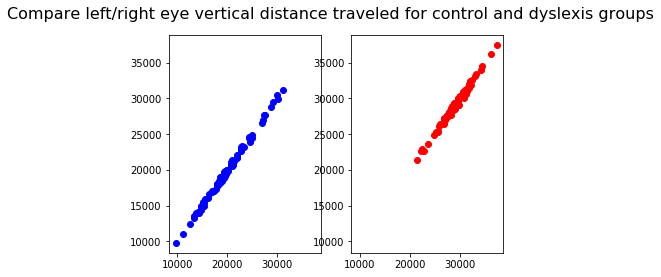

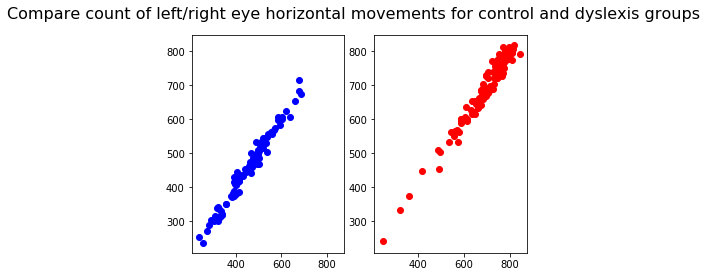

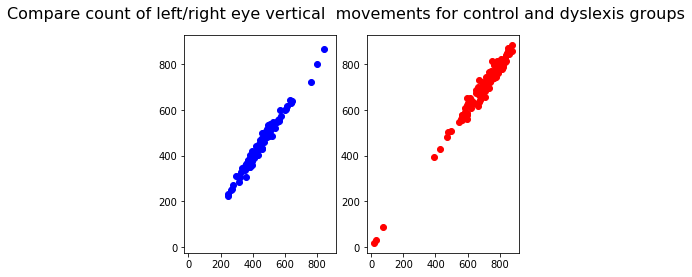

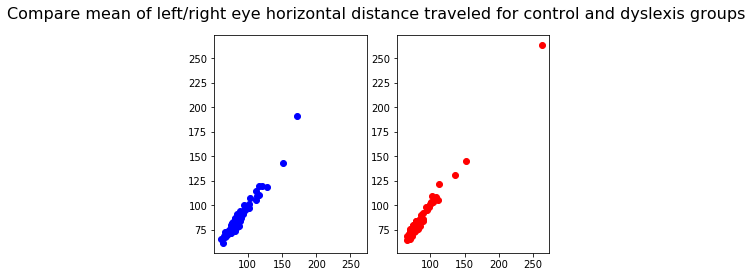

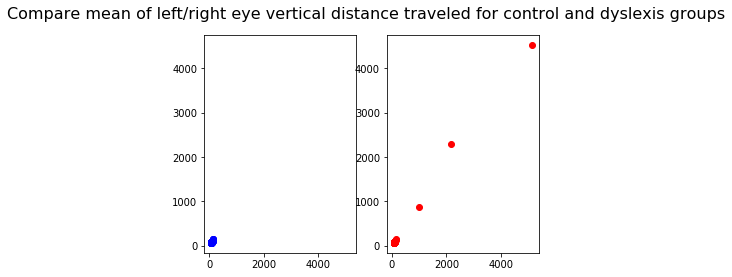

In [16]:
#Comparing left eye to right eye for controls (blue) and dyslexic (red) - horizontal movement adn vertical movekents
fig = plt.figure()
fig.suptitle('Compare left/right eye horizontal distance traveled for control and dyslexis groups', fontsize=16)
ax1 = fig.add_subplot(121)
ax1.plot((df0['LHorDirLSum'] +  df0['LHorDirRSum']), (df0['RHorDirLSum'] +  df0['RHorDirRSum']), 'bo')
ax2 = fig.add_subplot(122, sharex = ax1, sharey=ax1)
ax2.plot((df1['LHorDirLSum'] +  df1['LHorDirRSum']), (df1['RHorDirLSum'] +  df1['RHorDirRSum']), 'ro')
plt.show()
fig = plt.figure()
fig.suptitle('Compare left/right eye vertical distance traveled for control and dyslexis groups', fontsize=16)
ax1 = fig.add_subplot(121)
ax1.plot((df0['LVerDirUSum'] +  df0['LVerDirDSum']), (df0['RVerDirUSum'] +  df0['RVerDirDSum']), 'bo')
ax2 = fig.add_subplot(122, sharex = ax1, sharey=ax1)
ax2.plot((df1['LVerDirUSum'] +  df1['LVerDirDSum']), (df1['RVerDirUSum'] +  df1['RVerDirDSum']), 'ro')
plt.show()
fig = plt.figure()
fig.suptitle('Compare count of left/right eye horizontal movements for control and dyslexis groups', fontsize=16)
ax1 = fig.add_subplot(121)
ax1.plot((df0['LHorDirLCount'] +  df0['LHorDirRCount']), (df0['RHorDirLCount'] +  df0['RHorDirRCount']), 'bo')
ax2 = fig.add_subplot(122, sharex = ax1, sharey=ax1)
ax2.plot((df1['LHorDirLCount'] +  df1['LHorDirRCount']), (df1['RHorDirLCount'] +  df1['RHorDirRCount']), 'ro')
plt.show()
fig = plt.figure()
fig.suptitle('Compare count of left/right eye vertical  movements for control and dyslexis groups', fontsize=16)
ax1 = fig.add_subplot(121)
ax1.plot((df0['LVerDirUCount'] +  df0['LVerDirDCount']), (df0['RVerDirUCount'] +  df0['RVerDirDCount']), 'bo')
ax2 = fig.add_subplot(122, sharex = ax1, sharey=ax1)
ax2.plot((df1['LVerDirUCount'] +  df1['LVerDirDCount']), (df1['RVerDirUCount'] +  df1['RVerDirDCount']), 'ro')
plt.show()
fig = plt.figure()
fig.suptitle('Compare mean of left/right eye horizontal distance traveled for control and dyslexis groups', fontsize=16)
ax1 = fig.add_subplot(121)
ax1.plot((df0['LHorDirLMean'] +  df0['LHorDirRMean']), (df0['RHorDirLMean'] +  df0['RHorDirRMean']), 'bo')
ax2 = fig.add_subplot(122, sharex = ax1, sharey=ax1)
ax2.plot((df1['LHorDirLMean'] +  df1['LHorDirRMean']), (df1['RHorDirLMean'] +  df1['RHorDirRMean']), 'ro')
plt.show()
fig = plt.figure()
fig.suptitle('Compare mean of left/right eye vertical distance traveled for control and dyslexis groups', fontsize=16)
ax1 = fig.add_subplot(121)
ax1.plot((df0['LVerDirUMean'] +  df0['LVerDirDMean']), (df0['RVerDirUMean'] +  df0['RVerDirDMean']), 'bo')
ax2 = fig.add_subplot(122, sharex = ax1, sharey=ax1)
ax2.plot((df1['LVerDirUMean'] +  df1['LVerDirDMean']), (df1['RVerDirUMean'] +  df1['RVerDirDMean']), 'ro')
plt.show()

Observation of the scatter plot :  the LHorDirLMean,LVerDirRMean,LVerDirUMean and LVerDirDMean- which represents the mean value of the eye movement in the horizantal and vertical, up and down direction  seems to be very similar for the controls and high risk subjects. Whereas the count and the sum of the same features shows that the cluster towards one value and not uniform.